# <code style="background:	#77C3EC;color:#00008B;">                PREPARED BY : ANIKET SINGH (MODELLING)                                        <code style="background:yellow;color:#366ae8;">                                                                                                                                    

# <code style="background:	#77C3EC;color:#00008B;">                    IMPORTING REQUIRED LIBRARIES                         <code style="background:	#77C3EC;color:#00008B;">

In [1]:
import pandas as pd
import numpy as np

# <code style="background:	#77C3EC;color:#00008B;">                         ABOUT THE DATASET                                 <code style="background:#77C3EC;color:#00008B;">
    

 ## <code style="background:;color:#00008B;">Dataset:

- <b>Every row represents the sourcing of one unit of a particular product combination.
- <b>A unique product combination comprises of attributes mentioned in Columns A, B, C, D, E, F.
- <b>Since each row represents 1 unit of sourcing; therefore, you will find multiple rows with the same combination in the training dataset. Imagine buying 1 quantity being represented as a single row.
- <b>July 20 to May 21 is your training set and June 21 is your test set; So using the 11 months data (Training Set: June 2020 to May 2021) you'd have the forecast / predict the June 2021 number (Test Set).
- <b>June 2021 has only a single value for each combination as that is your test set (target).

In [2]:
Train_Data=pd.read_csv("Training Dataset.csv")

In [3]:
Train_Data.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


# <code style="background:	#77C3EC;color:#00008B;">                    UNDERSTANDING DATASET COLOUMNS                                 <code style="background:#77C3EC;color:#00008B;">
    

In [4]:
Train_Data["ProductType"].value_counts()

ProductType
NTM2    236726
NTM1    194923
NTM3    118527
Name: count, dtype: int64

In [5]:
Train_Data.shape

(550176, 8)

## <code style="background:#CCF381;color:#00008B;">CHECKING NUMBER OF DUPLICATE FOR A SINGLE ROW

In [6]:
# Specify the row values you want to match
row_to_match = {"ProductType": "NTM3", "Manufacturer": "X2", "Area Code": "A20", "Sourcing Channel": "DIRECT",
                "Product Size": "Large", "Product Type": "Powder", "Month of Sourcing": "Mar-21", "Sourcing Cost": 85.71}

# Check for rows with exactly the same values
matching_rows = Train_Data.eq(row_to_match).all(axis=1)

# Count the number of matching rows
num_matching_rows = matching_rows.sum()

print("Number of rows with exactly the same values:", num_matching_rows)

# Display the matching rows
matching_data = Train_Data[matching_rows]
print("\nMatching Rows:")
matching_data

Number of rows with exactly the same values: 34

Matching Rows:


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
9,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
4302,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
5857,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
10610,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
10966,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
15307,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
26879,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
38548,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
47256,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71
52905,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71


## <code style="background:#CCF381;color:#00008B;">CHECKING TOTAL DUPLICATE ROWS

In [7]:
# Specify the columns to consider for duplicates
columns_to_check = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost']

# Check for duplicate rows considering only the specified columns
duplicate_rows = Train_Data.duplicated(subset=columns_to_check, keep='first')

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

print("Number of duplicate rows considering specified columns:", num_duplicate_rows)

Number of duplicate rows considering specified columns: 542796


In [8]:
Train_Data.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

# <code style="background:	#77C3EC;color:#00008B;">HANDLE DUPLICATE ROWS WITHOUT DELETING                                 <code style="background:#77C3EC;color:#00008B;">

In [9]:
import pandas as pd

def add_duplicate_count(df):
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Exclude the 'Count+Unique' column when checking for duplicates
    cols_to_check = df_copy.columns.difference(['Count+Unique'])
    
    # Mark duplicates based on all columns except 'Count+Unique'
    df_copy['Duplicate'] = df_copy.duplicated(subset=cols_to_check, keep=False)
    
    # Count the number of duplicates for each row and update 'Duplicate' column
    df_copy['Count'] = df_copy.groupby(list(cols_to_check))['Duplicate'].transform('sum')
    
    # Count the number of unique rows for each group
    df_copy['Unique'] = (~df_copy.duplicated(subset=cols_to_check, keep=False)).astype(int)
    
    # Merge 'Count' and 'Unique' columns into a single column 'Count+Unique'
    df_copy['Count+Unique'] = df_copy['Count'] + df_copy['Unique']
    
    # Drop 'Count' and 'Unique' columns to keep only 'Count+Unique'
    df_copy = df_copy.drop(columns=['Count', 'Unique', 'Duplicate'])  # Remove 'Count' and 'Unique' columns
    
    # Remove duplicates based on all columns except 'Count+Unique'
    df_copy = df_copy.drop_duplicates(subset=cols_to_check)
    
    return df_copy


# Call the function to add the 'Count+Unique' column by merging 'Count' and 'Unique'
Train_Data = add_duplicate_count(Train_Data)

Train_Data.rename(columns={'Count+Unique': 'GranuleComboUnits'}, inplace=True)

Train_Data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,GranuleComboUnits
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16,62
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28,38
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46,64
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22,135
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76,31


In [10]:
Train_Data['GranuleComboUnits'].sum()

550176

<div class="alert alert-success">
    <b>Granularity of Data:<br></b>
Each row representing a single unit of sourcing indicates a fine-grained level of data granularity. Duplicates in this context likely reflect distinct sourcing events or transactions, even if the combination of attributes is the same.<br><br>
<b>Analytical Value:<br></b>
Retaining these duplicate rows can provide valuable insights into the frequency, patterns, and variability of sourcing events for specific product combinations. For analytical purposes, such as forecasting or understanding sourcing behavior, these duplicates can be informative.<br><br>
<b>Preservation of Information:<br></b>
Removing duplicate rows in this scenario could lead to information loss. Each sourcing instance, even if it shares the same combination of attributes, may have unique characteristics or implications that are relevant for analysis.<br>
</div>


<div class="alert alert-warning">
<b
   >95% of the Data rows were duplicated with exactly same Attribute combination (A,B,C,D,E) Which can cause dataset training time coloumn GranuleComboUnits is storing count of duplicated rows and then we delete duplicate which decrease size of dataset without reducing Importance.
</div>

In [11]:
Train_Data['GranuleComboUnits'].value_counts()

GranuleComboUnits
1      282
2      276
3      209
4      200
7      160
      ... 
591      1
458      1
499      1
613      1
320      1
Name: count, Length: 489, dtype: int64

# <code style="background:	#77C3EC;color:#00008B;">CHECK FOR POTENTIAL OUTLIERS                                                    <code style="background:#77C3EC;color:#00008B;">

In [12]:
# Display rows where GranuleComboUnits is 1
unique_combinations = Train_Data[Train_Data['GranuleComboUnits'] == 1]
unique_combinations


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,GranuleComboUnits
83,NTM2,X1,A32,RETAIL,Small,Powder,Mar-21,127.68,1
363,NTM2,X1,A37,DIRECT,Large,Powder,Aug-20,180.00,1
1818,NTM2,X1,A37,DIRECT,Large,Powder,Nov-20,0.00,1
2560,NTM1,X1,A29,DIRECT,Small,Powder,Mar-21,169.56,1
3125,NTM1,X2,A44,DIRECT,Large,Liquid,Oct-20,129.82,1
...,...,...,...,...,...,...,...,...,...
544244,NTM2,X1,A23,RETAIL,Large,Powder,Sep-20,14110.72,1
545699,NTM2,X1,A10,DIRECT,Small,Powder,Sep-20,133.85,1
547625,NTM2,X1,A16,DIRECT,Small,Powder,May-21,12630.47,1
548160,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,Nov-20,741.00,1


In [13]:
# Calculate summary statistics
summary_stats = Train_Data['GranuleComboUnits'].describe()
summary_stats

count    7380.000000
mean       74.549593
std       105.935018
min         1.000000
25%        11.000000
50%        37.000000
75%        99.000000
max      1796.000000
Name: GranuleComboUnits, dtype: float64

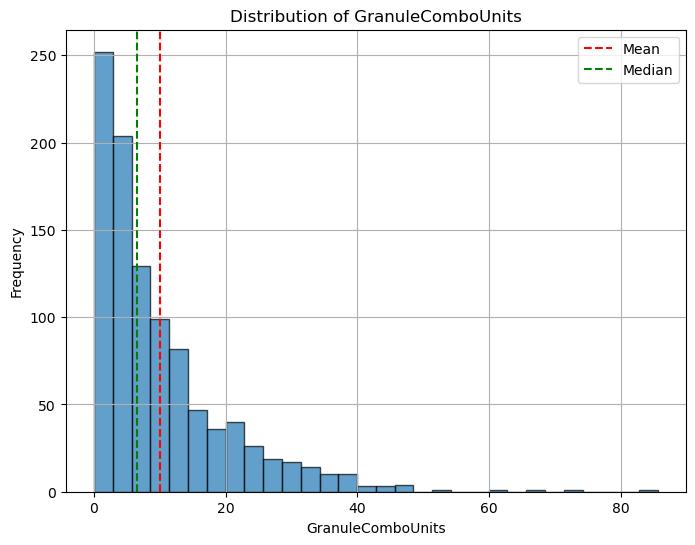

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a sample right-skewed distribution
np.random.seed(0)
data = np.random.exponential(scale=10, size=1000)  # Exponential distribution for demonstration

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
plt.axvline(np.median(data), color='green', linestyle='dashed', linewidth=1.5, label='Median')
plt.xlabel('GranuleComboUnits')
plt.ylabel('Frequency')
plt.title('Distribution of GranuleComboUnits')
plt.legend()
plt.grid(True)
plt.show()


<h2><code style="background:#CCF381;color:#00008B;">Possible Insights from GranuleComboUnits Summary Statistics:</h2>

<ul>
  <li><strong>Central Tendency</strong>:
    <ul>
      <li>The <strong>mean</strong> value of <strong>74.55</strong> indicates the average number of units for each combination of attributes. This gives you an idea of the typical quantity of products in each sourcing event.</li>
    </ul>
  </li>

  <li><strong>Variability</strong>:
    <ul>
      <li>The <strong>standard deviation</strong> of <strong>105.94</strong> suggests a considerable amount of variability or dispersion in the number of units across different combinations. Some combinations may have significantly higher or lower quantities compared to the mean.</li>
    </ul>
  </li>

  <li><strong>Minimum and Maximum Values</strong>:
    <ul>
      <li>The <strong>minimum</strong> value of <strong>1</strong> and the <strong>maximum</strong> value of <strong>1796</strong> highlight the range of counts observed. This indicates that while most combinations have relatively low counts, some combinations can have a very high number of units sourced.</li>
    </ul>
  </li>

  <li><strong>Quartiles</strong>:
    <ul>
      <li>The <strong>25th percentile (Q1)</strong> of <strong>11</strong> suggests that a quarter of the combinations have a count of 11 units or fewer.</li>
      <li>The <strong>median (50th percentile, Q2)</strong> of <strong>37</strong> indicates that half of the combinations have 37 units or fewer.</li>
      <li>The <strong>75th percentile (Q3)</strong> of <strong>99</strong> shows that three-quarters of the combinations have 99 units or fewer.</li>
    </ul>
  </li>

  <li><strong>Distribution Shape</strong>:
    <ul>
      <li>The median being smaller than the mean suggests a <strong>right-skewed distribution</strong>, where there are some combinations with very high unit counts that push the mean higher than the median.</li>
    </ul>
  </li>
</ul>

<h2>Possible Insights and Actions:</h2>

<ul>
  <li><strong>Identifying High-Volume Combinations</strong>:
    <ul>
      <li>Explore combinations with high <code>GranuleComboUnits</code> counts (e.g., above the 75th percentile) to understand which combinations are sourced in large quantities. This information could be valuable for inventory management, production planning, or marketing strategies.</li>
    </ul>
  </li>

  <li><strong>Outlier Detection</strong>:
    <ul>
      <li>Given the wide range between the minimum and maximum values, consider investigating combinations with extremely high counts (outliers). These outliers could represent unique events or data errors that may require further examination.</li>
    </ul>
  </li>

  <li><strong>Segmentation</strong>:
    <ul>
      <li>Based on the quartiles or other criteria, segment the combinations into categories (e.g., low, medium, high volume) to analyze trends, patterns, and behaviors associated with different volume levels.</li>
    </ul>
  </li>

  <li><strong>Forecasting and Predictive Modeling</strong>:
    <ul>
      <li>Use historical data on <code>GranuleComboUnits</code> along with other attributes to build forecasting models or predictive models to estimate future unit counts for different combinations. Machine learning algorithms like regression or time series analysis could be applied here.</li>
    </ul>
  </li>
</ul>

<p>These insights can guide your decision-making processes, operational strategies, and analytical approaches when working with the <code>GranuleComboUnits</code> column in your dataset.</p>


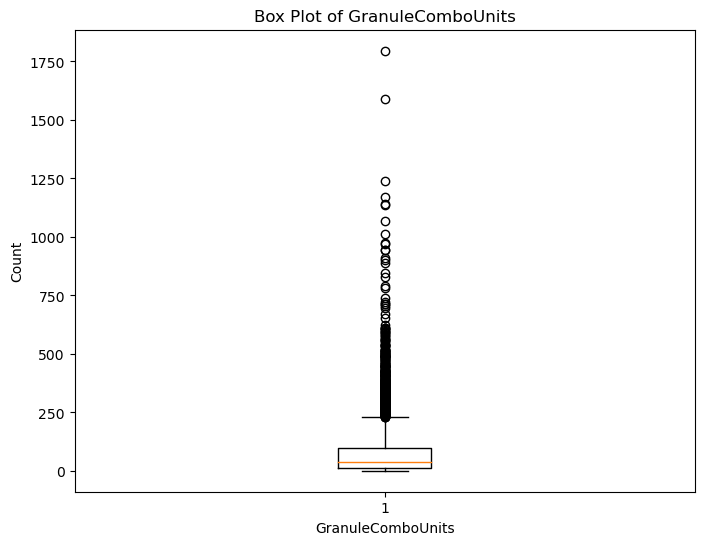

Number of outliers with GranuleComboUnits > 200: 645

Outlier details:
+----------+----------+----------+-----------+------------+----------+----------+----------+----------+
| Prod.... | Manu.... | Area.... | Sour....  |  Prod....  | Prod.... | Mont.... | Sour.... | Gran.... |
+----------+----------+----------+-----------+------------+----------+----------+----------+----------+
|   NTM3   |    X1    |   A18    |  RETAIL   |   Large    |  Liquid  |  Nov-20  |  154.04  |   218    |
|   NTM1   |    X1    |    A4    |  DIRECT   |   Large    |  Powder  |  Apr-21  |  143.92  |   244    |
|   NTM2   |    X1    |    A6    |  DIRECT   |   Large    |  Powder  |  Nov-20  |  150.02  |   206    |
|   NTM2   |    X1    |   A29    |  DIRECT   |   Small    |  Powder  |  Jul-20  |  56.52   |   421    |
|   NTM1   |    X1    |   A10    |  DIRECT   |   Large    |  Powder  |  Sep-20  |  138.52  |   352    |
|   NTM2   |    X1    |   A19    |  DIRECT   |   Large    |  Powder  |  Aug-20  |  109.49  |   24

In [15]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(Train_Data['GranuleComboUnits'])
plt.xlabel('GranuleComboUnits')
plt.ylabel('Count')
plt.title('Box Plot of GranuleComboUnits')
plt.show()

# Quantify outliers above 250
outliers_threshold = 200  # Threshold for outliers
outliers = Train_Data[Train_Data['GranuleComboUnits'] > outliers_threshold]
num_outliers = len(outliers)

# Truncate column names
truncated_headers = [header[:4] + '....' if len(header) > 4 else header for header in outliers.columns]

# Format and print the table with truncated column names
table_data = outliers.values.tolist()

print(f"Number of outliers with GranuleComboUnits > {outliers_threshold}: {num_outliers}")
if num_outliers > 0:
    print("\nOutlier details:")
    print(tabulate(table_data, headers=truncated_headers, tablefmt='pretty'))
else:
    print("No outliers found above the threshold.")


<p>It appears that there are <strong>645 outliers</strong> in your dataset where <code>GranuleComboUnits</code> is greater than 200. These outliers represent instances where a significant number of units were sourced for a particular combination. Here are a few observations based on the provided outlier details:</p>

<ul>
  <li><strong>Variability in Sourcing Quantities:</strong> The outliers indicate a wide range of sourcing quantities, ranging from 206 units to as high as 421 units for a single combination. This variability suggests diverse sourcing patterns across different combinations.</li>

  <li><strong>Product Attributes:</strong> The outlier combinations involve various product attributes such as ProductType, Manufacturer, Area Code, Sourcing Channel, Product Size, and Product Type. This diversity in attributes contributing to outliers reflects the complexity of your dataset.</li>

  <li><strong>Temporal Distribution:</strong> Outliers are observed across different months of sourcing, indicating that high sourcing quantities are not limited to specific time periods but can occur throughout the dataset timeline.</li>

  <li><strong>Cost Considerations:</strong> It's interesting to note the Sourcing Cost associated with these outliers. For instance, some combinations with high <code>GranuleComboUnits</code> have relatively high Sourcing Costs, while others have lower costs. This variation could be due to factors like discounts, promotions, or supplier agreements.</li>

  <li><strong>Potential Insights and Actions:</strong> Analyzing these outliers further can provide insights into the factors driving high sourcing quantities. It may also prompt actions such as investigating demand patterns, optimizing inventory management strategies for high-volume combinations, or exploring pricing strategies for cost-effective sourcing.</li>
</ul>


# <code style="background:	#77C3EC;color:#00008B;">DATA PREPROCESSING                                                  <code style="background:#77C3EC;color:#00008B;">

## <code style="background:#CCF381;color:#00008B;">ONE HOT ENCODING 

In [16]:
Train_Data['ProductType'].value_counts()

ProductType
NTM2    3086
NTM1    2225
NTM3    2069
Name: count, dtype: int64

In [17]:
Train_Data['Manufacturer'].value_counts()

Manufacturer
X1    5334
X2    1863
X3     183
Name: count, dtype: int64

In [18]:
Train_Data['Sourcing Channel'].value_counts()

Sourcing Channel
DIRECT       5924
RETAIL       1070
ECOM          306
WHOLESALE      80
Name: count, dtype: int64

In [19]:
Train_Data['Product Size'].value_counts()

Product Size
Large         4049
Small         3187
ExtraLarge     144
Name: count, dtype: int64

In [20]:
Train_Data['Product Type'].value_counts()

Product Type
Powder    5636
Liquid    1744
Name: count, dtype: int64

In [21]:
import pandas as pd

# Columns to apply one-hot encoding
columns_to_encode = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']

# Apply one-hot encoding without prefix
Train_Data= pd.get_dummies(Train_Data, columns=columns_to_encode, prefix='', prefix_sep='')

# Display the encoded DataFrame
Train_Data.head()

,Area Code,Month of Sourcing,Sourcing Cost,GranuleComboUnits,NTM1,NTM2,NTM3,X1,X2,X3,DIRECT,ECOM,RETAIL,WHOLESALE,ExtraLarge,Large,Small,Liquid,Powder
0,A28,May-21,10.16,62,False,False,True,True,False,False,False,False,False,True,False,True,False,False,True
1,A9,Oct-20,134.28,38,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True
2,A20,Dec-20,12.46,64,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True
3,A18,Feb-21,107.22,135,False,False,True,True,False,False,False,False,False,True,False,False,True,False,True
4,A28,Nov-20,197.76,31,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False


## <code style="background:#CCF381;color:#00008B;">DROPPING SOME COLOUMNS


<div class="alert alert-warning">
<code style="background:;color:#00008B;"><b>Training Data vs. Testing Data Disparity:

Upon comparing the training data with the testing data, a notable observation emerged regarding the "Area Code" column. In the training data, this column contains a significantly higher number of distinct and larger values compared to the testing data. This variance can potentially mislead machine learning models during training, leading to erroneous learning patterns.

 <code style="background:;color:#00008B;">Month of Sourcing's Insignificant Contribution:

In the testing data, only the data for the month of June is available, whereas the training data spans eleven months. Upon model application and subsequent analysis of results and feature importance, it was noted that the "Month of Sourcing" attribute does not contribute significantly to the model's predictive power. This suggests that its inclusion may not be beneficial for model performance.

 <code style="background:;color:#00008B;">Impact of GranuleComboUnits on Model Training:

A closer examination of the "GranuleComboUnits" attribute revealed interesting insights. Through iterative experimentation with various models and trial-and-error processes, it was discovered that all rows in the testing data are unique, resulting in a "GranuleComboUnits" value of 1 for each row. However, in the training data, there are instances of very high numbers for "GranuleComboUnits."

This disparity in "GranuleComboUnits" values between the training and testing datasets could potentially skew model predictions. While "GranuleComboUnits" serves as a valuable feature for exploratory data analysis (EDA), its significance diminishes during model training, particularly when dealing with a small testing dataset. This phenomenon highlights the importance of carefully considering feature relevance and dataset characteristics during the modeling process.




In [22]:
# Drop 'Area Code' and 'Month of Sourcing' columns
Train_Data.drop(columns=['Area Code', 'Month of Sourcing','GranuleComboUnits'], inplace=True)

# Display the DataFrame after dropping columns
Train_Data.head()

,Sourcing Cost,NTM1,NTM2,NTM3,X1,X2,X3,DIRECT,ECOM,RETAIL,WHOLESALE,ExtraLarge,Large,Small,Liquid,Powder
0,10.16,False,False,True,True,False,False,False,False,False,True,False,True,False,False,True
1,134.28,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True
2,12.46,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True
3,107.22,False,False,True,True,False,False,False,False,False,True,False,False,True,False,True
4,197.76,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False


<div class="alert alert-success">
    <b>99% DATA LIES IN RANGE 0-300 OF SOURCING COST<br></b>
    </div>

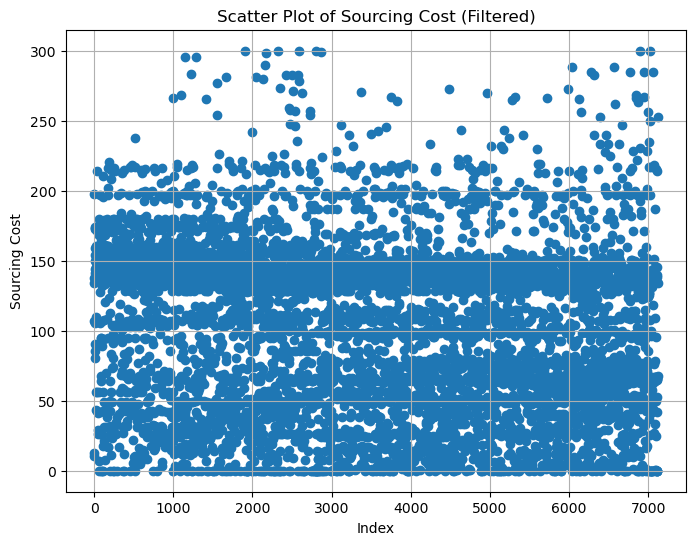

Scatter Plot Report:
--------------------
Number of Data Points Plotted: 7119
Range of Sourcing Cost: 0.0 to 300.0
Observations:
- The scatter plot shows the distribution of Sourcing Cost values.
- There are 7119 data points plotted.
- The Sourcing Cost ranges from 0.0 to 300.0


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter rows where 'Sourcing Cost' is less than or equal to 300
Train_Data = Train_Data[(Train_Data['Sourcing Cost'] >= 0) & (Train_Data['Sourcing Cost'] <= 300)]
Train_Data = Train_Data.reset_index(drop=True)


# Plot scatter plot for filtered data
plt.figure(figsize=(8, 6))
plt.scatter(Train_Data.index, Train_Data['Sourcing Cost'])
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('Scatter Plot of Sourcing Cost (Filtered)')
plt.grid(True)
plt.show()

# Scatter plot report
print("Scatter Plot Report:")
print("--------------------")
print("Number of Data Points Plotted:", len(Train_Data))
print("Range of Sourcing Cost:", Train_Data['Sourcing Cost'].min(), "to", Train_Data['Sourcing Cost'].max())
print("Observations:")
print("- The scatter plot shows the distribution of Sourcing Cost values.")
print("- There are", len(Train_Data), "data points plotted.")
print("- The Sourcing Cost ranges from", Train_Data['Sourcing Cost'].min(), "to", Train_Data['Sourcing Cost'].max())


<div class="alert alert-success">
    <b>Now All independent coloumns are Categorical With target coloumn as Continuous in nature<br></b>
    </div>

# <code style="background:	#77C3EC;color:#00008B;">SIMILARILY PREPROCESS TEST DATA                                                  <code style="background:#77C3EC;color:#00008B;">

In [24]:
Test_Data=pd.read_csv("Test Dataset.csv")

In [25]:
import pandas as pd

# Columns to apply one-hot encoding
columns_to_encode = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']

# Apply one-hot encoding without prefix
Test_Data= pd.get_dummies(Test_Data, columns=columns_to_encode, prefix='', prefix_sep='')

# Drop 'Area Code' and 'Month of Sourcing' columns
Test_Data.drop(columns=['Area Code', 'Month of Sourcing'], inplace=True)

# Display the DataFrame after dropping columns
Test_Data.head()

,Sourcing Cost,NTM1,NTM2,NTM3,X1,X2,X3,DIRECT,ECOM,RETAIL,WHOLESALE,ExtraLarge,Large,Small,Liquid,Powder
0,103.68,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True
1,155.75,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2,143.02,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True
3,139.39,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
4,169.42,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True


# <code style="background:	#77C3EC;color:#00008B;">SAVE THE PREPROCESSED DATA                                                  <code style="background:#77C3EC;color:#00008B;">

In [26]:
Test_Data.to_csv('Test_data.csv', index=False)
Train_Data.to_csv('Train_data.csv', index=False)

# <code style="background:	#77C3EC;color:#00008B;">                            MODELLING                                 <code style="background:#77C3EC;color:#00008B;">
    

## <code style="background:#CCF381;color:#00008B;">IMPORTING PREPROCESSED DATASET FOR MODELLING

In [27]:
Train_data=pd.read_csv("Train_data.csv")
Train_data.head()

,Sourcing Cost,NTM1,NTM2,NTM3,X1,X2,X3,DIRECT,ECOM,RETAIL,WHOLESALE,ExtraLarge,Large,Small,Liquid,Powder
0,10.16,False,False,True,True,False,False,False,False,False,True,False,True,False,False,True
1,134.28,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True
2,12.46,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True
3,107.22,False,False,True,True,False,False,False,False,False,True,False,False,True,False,True
4,197.76,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False


In [28]:
Test_data=pd.read_csv("Test_data.csv")
Test_data.head()

,Sourcing Cost,NTM1,NTM2,NTM3,X1,X2,X3,DIRECT,ECOM,RETAIL,WHOLESALE,ExtraLarge,Large,Small,Liquid,Powder
0,103.68,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True
1,155.75,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2,143.02,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True
3,139.39,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
4,169.42,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True


## <code style="background:#CCF381;color:#00008B;">RANDOM FOREST REGRESSOR

Training Metrics:
R2 Score: 0.4473
RMSE: 42.5007
MAE: 30.3796

Test Metrics:
R2 Score: 0.3991
RMSE: 40.3762
MAE: 29.2399



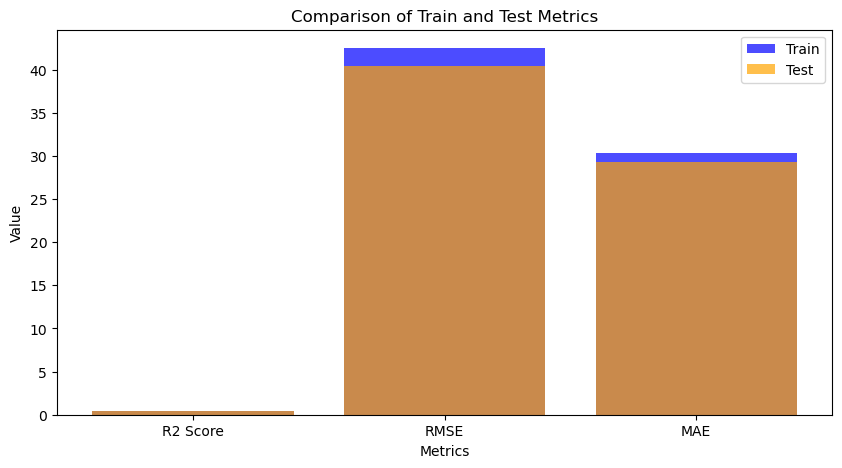

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming your training data is stored in a DataFrame named Train_data
# Assuming your test data is stored in a DataFrame named Test_data

# Define features and target variable
features = Train_data.drop('Sourcing Cost', axis=1)
target = Train_data['Sourcing Cost']

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(features, target)

# Predict on training and test data
train_predictions = rf_model.predict(features)
test_predictions = rf_model.predict(Test_data.drop('Sourcing Cost', axis=1))

# Calculate R2, RMSE, and MAE for training data
train_r2 = r2_score(target, train_predictions)
train_rmse = mean_squared_error(target, train_predictions, squared=False)
train_mae = mean_absolute_error(target, train_predictions)

# Calculate R2, RMSE, and MAE for test data
test_r2 = r2_score(Test_data['Sourcing Cost'], test_predictions)
test_rmse = mean_squared_error(Test_data['Sourcing Cost'], test_predictions, squared=False)
test_mae = mean_absolute_error(Test_data['Sourcing Cost'], test_predictions)

# Print the metrics
print(f"Training Metrics:\nR2 Score: {train_r2:.4f}\nRMSE: {train_rmse:.4f}\nMAE: {train_mae:.4f}\n")
print(f"Test Metrics:\nR2 Score: {test_r2:.4f}\nRMSE: {test_rmse:.4f}\nMAE: {test_mae:.4f}\n")

# Plotting the metrics
metrics = ['R2 Score', 'RMSE', 'MAE']
train_values = [train_r2, train_rmse, train_mae]
test_values = [test_r2, test_rmse, test_mae]

plt.figure(figsize=(10, 5))
plt.bar(metrics, train_values, color='blue', alpha=0.7, label='Train')
plt.bar(metrics, test_values, color='orange', alpha=0.7, label='Test')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Train and Test Metrics')
plt.legend()
plt.show()


## <code style="background:#CCF381;color:#00008B;">Random Forest Regressor + GridSearchCV + Gradient Boosting

Random Forest Metrics:
Training R2 Score: 0.4473
Training RMSE: 42.5007
Training MAE: 30.3796
Test R2 Score: 0.3991
Test RMSE: 40.3762
Test MAE: 29.2399

Gradient Boosting Metrics:
Training R2 Score: 0.4365
Training RMSE: 42.9166
Training MAE: 30.6085
Test R2 Score: 0.3916
Test RMSE: 40.6264
Test MAE: 29.4692


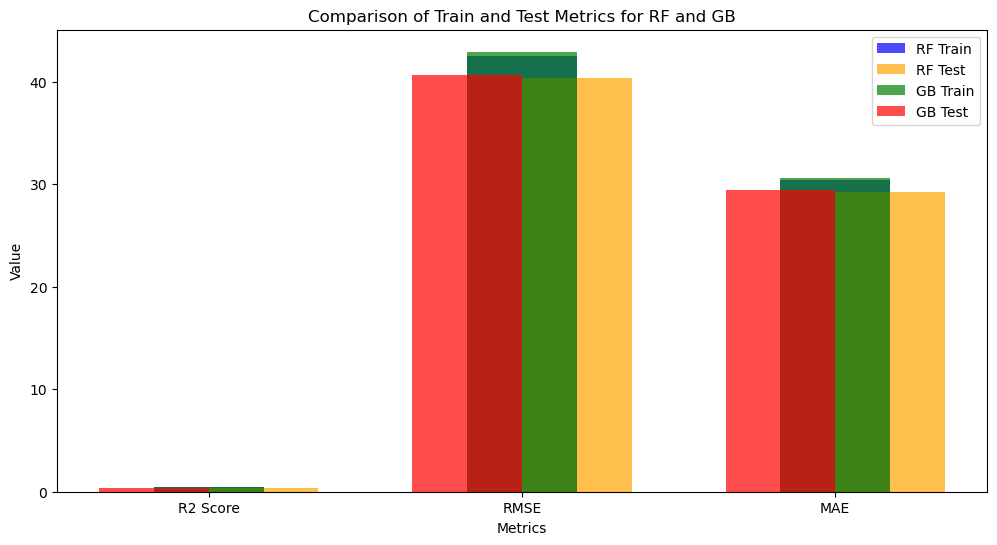

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming your training data is stored in a DataFrame named Train_data
# Assuming your test data is stored in a DataFrame named Test_data

# Define features and target variable
features = Train_data.drop('Sourcing Cost', axis=1)
target = Train_data['Sourcing Cost']

# Initialize Random Forest Regressor and Gradient Boosting Regressor
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(features, target)
best_rf_model = rf_grid_search.best_estimator_

# Train Gradient Boosting Regressor
gb_model.fit(features, target)

# Predict on training and test data using the best RF model
train_predictions_rf = best_rf_model.predict(features)
test_predictions_rf = best_rf_model.predict(Test_data.drop('Sourcing Cost', axis=1))

# Predict on training and test data using GB model
train_predictions_gb = gb_model.predict(features)
test_predictions_gb = gb_model.predict(Test_data.drop('Sourcing Cost', axis=1))

# Calculate metrics for Random Forest
train_r2_rf = r2_score(target, train_predictions_rf)
train_rmse_rf = mean_squared_error(target, train_predictions_rf, squared=False)
train_mae_rf = mean_absolute_error(target, train_predictions_rf)
test_r2_rf = r2_score(Test_data['Sourcing Cost'], test_predictions_rf)
test_rmse_rf = mean_squared_error(Test_data['Sourcing Cost'], test_predictions_rf, squared=False)
test_mae_rf = mean_absolute_error(Test_data['Sourcing Cost'], test_predictions_rf)

# Calculate metrics for Gradient Boosting
train_r2_gb = r2_score(target, train_predictions_gb)
train_rmse_gb = mean_squared_error(target, train_predictions_gb, squared=False)
train_mae_gb = mean_absolute_error(target, train_predictions_gb)
test_r2_gb = r2_score(Test_data['Sourcing Cost'], test_predictions_gb)
test_rmse_gb = mean_squared_error(Test_data['Sourcing Cost'], test_predictions_gb, squared=False)
test_mae_gb = mean_absolute_error(Test_data['Sourcing Cost'], test_predictions_gb)

# Print the metrics for Random Forest
print("Random Forest Metrics:")
print(f"Training R2 Score: {train_r2_rf:.4f}")
print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Training MAE: {train_mae_rf:.4f}")
print(f"Test R2 Score: {test_r2_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}")
print(f"Test MAE: {test_mae_rf:.4f}")

# Print the metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Training R2 Score: {train_r2_gb:.4f}")
print(f"Training RMSE: {train_rmse_gb:.4f}")
print(f"Training MAE: {train_mae_gb:.4f}")
print(f"Test R2 Score: {test_r2_gb:.4f}")
print(f"Test RMSE: {test_rmse_gb:.4f}")
print(f"Test MAE: {test_mae_gb:.4f}")

# Plotting the metrics for Random Forest and Gradient Boosting
metrics = ['R2 Score', 'RMSE', 'MAE']
train_rf_values = [train_r2_rf, train_rmse_rf, train_mae_rf]
test_rf_values = [test_r2_rf, test_rmse_rf, test_mae_rf]
train_gb_values = [train_r2_gb, train_rmse_gb, train_mae_gb]
test_gb_values = [test_r2_gb, test_rmse_gb, test_mae_gb]

plt.figure(figsize=(12, 6))
plt.bar(metrics, train_rf_values, color='blue', alpha=0.7, width=0.35, label='RF Train')
plt.bar(metrics, test_rf_values, color='orange', alpha=0.7, width=0.35, label='RF Test', align='edge')
plt.bar(metrics, train_gb_values, color='green', alpha=0.7, width=-0.35, label='GB Train')
plt.bar(metrics, test_gb_values, color='red', alpha=0.7, width=-0.35, label='GB Test', align='edge')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Train and Test Metrics for RF and GB')
plt.legend()
plt.show()


## <code style="background:#CCF381;color:#00008B;">SVR + Gradient Boosting

Support Vector Regression (SVR) Metrics:
Training R2 Score: 0.3893
Training RMSE: 44.6746
Training MAE: 28.5491
Test R2 Score: 0.3179
Test RMSE: 43.0169
Test MAE: 27.3541


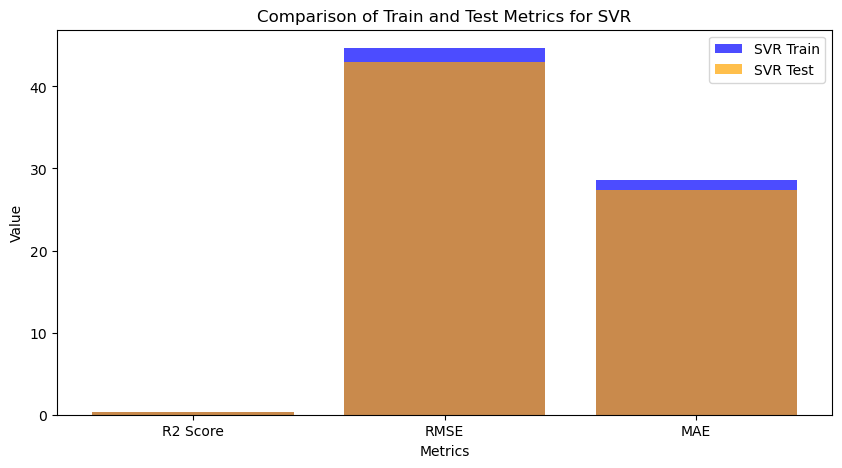

In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming your training data is stored in a DataFrame named Train_data
# Assuming your test data is stored in a DataFrame named Test_data

# Define features and target variable
features = Train_data.drop('Sourcing Cost', axis=1)
target = Train_data['Sourcing Cost']

# Initialize Support Vector Regression (SVR) model
svr_model = SVR()

# Hyperparameter tuning with GridSearchCV for SVR
svr_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}
svr_grid_search = GridSearchCV(svr_model, param_grid=svr_param_grid, cv=5)
svr_grid_search.fit(features, target)
best_svr_model = svr_grid_search.best_estimator_

# Predict on training and test data using the best SVR model
train_predictions_svr = best_svr_model.predict(features)
test_predictions_svr = best_svr_model.predict(Test_data.drop('Sourcing Cost', axis=1))

# Calculate metrics for SVR
train_r2_svr = r2_score(target, train_predictions_svr)
train_rmse_svr = mean_squared_error(target, train_predictions_svr, squared=False)
train_mae_svr = mean_absolute_error(target, train_predictions_svr)
test_r2_svr = r2_score(Test_data['Sourcing Cost'], test_predictions_svr)
test_rmse_svr = mean_squared_error(Test_data['Sourcing Cost'], test_predictions_svr, squared=False)
test_mae_svr = mean_absolute_error(Test_data['Sourcing Cost'], test_predictions_svr)

# Print the metrics for SVR
print("Support Vector Regression (SVR) Metrics:")
print(f"Training R2 Score: {train_r2_svr:.4f}")
print(f"Training RMSE: {train_rmse_svr:.4f}")
print(f"Training MAE: {train_mae_svr:.4f}")
print(f"Test R2 Score: {test_r2_svr:.4f}")
print(f"Test RMSE: {test_rmse_svr:.4f}")
print(f"Test MAE: {test_mae_svr:.4f}")

# Plotting the metrics for SVR
metrics = ['R2 Score', 'RMSE', 'MAE']
train_svr_values = [train_r2_svr, train_rmse_svr, train_mae_svr]
test_svr_values = [test_r2_svr, test_rmse_svr, test_mae_svr]

plt.figure(figsize=(10, 5))
plt.bar(metrics, train_svr_values, color='blue', alpha=0.7, label='SVR Train')
plt.bar(metrics, test_svr_values, color='orange', alpha=0.7, label='SVR Test')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Train and Test Metrics for SVR')
plt.legend()
plt.show()


## <code style="background:#CCF381;color:#00008B;">XGboost

XGBoost Metrics:
Training R2 Score: 0.4462
Training RMSE: 42.5428
Training MAE: 30.5429
Test R2 Score: 0.4039
Test RMSE: 40.2144
Test MAE: 29.2672


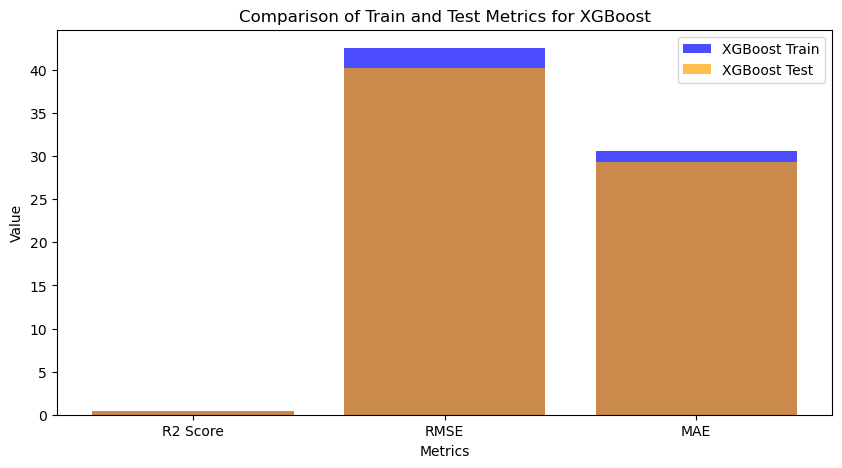

In [32]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming your training data is stored in a DataFrame named Train_data
# Assuming your test data is stored in a DataFrame named Test_data

# Define features and target variable
features = Train_data.drop('Sourcing Cost', axis=1)
target = Train_data['Sourcing Cost']

# Initialize XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV for XGBoost
xgb_param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
xgb_grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=5)
xgb_grid_search.fit(features, target)
best_xgb_model = xgb_grid_search.best_estimator_

# Predict on training and test data using the best XGBoost model
train_predictions_xgb = best_xgb_model.predict(features)
test_predictions_xgb = best_xgb_model.predict(Test_data.drop('Sourcing Cost', axis=1))

# Calculate metrics for XGBoost
train_r2_xgb = r2_score(target, train_predictions_xgb)
train_rmse_xgb = mean_squared_error(target, train_predictions_xgb, squared=False)
train_mae_xgb = mean_absolute_error(target, train_predictions_xgb)
test_r2_xgb = r2_score(Test_data['Sourcing Cost'], test_predictions_xgb)
test_rmse_xgb = mean_squared_error(Test_data['Sourcing Cost'], test_predictions_xgb, squared=False)
test_mae_xgb = mean_absolute_error(Test_data['Sourcing Cost'], test_predictions_xgb)

# Print the metrics for XGBoost
print("XGBoost Metrics:")
print(f"Training R2 Score: {train_r2_xgb:.4f}")
print(f"Training RMSE: {train_rmse_xgb:.4f}")
print(f"Training MAE: {train_mae_xgb:.4f}")
print(f"Test R2 Score: {test_r2_xgb:.4f}")
print(f"Test RMSE: {test_rmse_xgb:.4f}")
print(f"Test MAE: {test_mae_xgb:.4f}")

# Plotting the metrics for XGBoost
metrics = ['R2 Score', 'RMSE', 'MAE']
train_xgb_values = [train_r2_xgb, train_rmse_xgb, train_mae_xgb]
test_xgb_values = [test_r2_xgb, test_rmse_xgb, test_mae_xgb]

plt.figure(figsize=(10, 5))
plt.bar(metrics, train_xgb_values, color='blue', alpha=0.7, label='XGBoost Train')
plt.bar(metrics, test_xgb_values, color='orange', alpha=0.7, label='XGBoost Test')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Train and Test Metrics for XGBoost')
plt.legend()
plt.show()


## <code style="background:#CCF381;color:#00008B;">LSTM

C:\Users\anike\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 13796.1631 - val_loss: 13027.8301
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11375.1729 - val_loss: 9916.0166
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8849.3506 - val_loss: 7022.0190
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6115.8530 - val_loss: 4311.8662
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3879.7402 - val_loss: 2696.6802
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2497.3887 - val_loss: 2109.6040
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2041.6552 - val_loss: 1959.4103
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1948.4412 - val_loss: 1899.9426
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2019.0969 - val_loss: 1899.6748
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1939.3934 - val_loss: 1893.3220
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1989.4147 - va

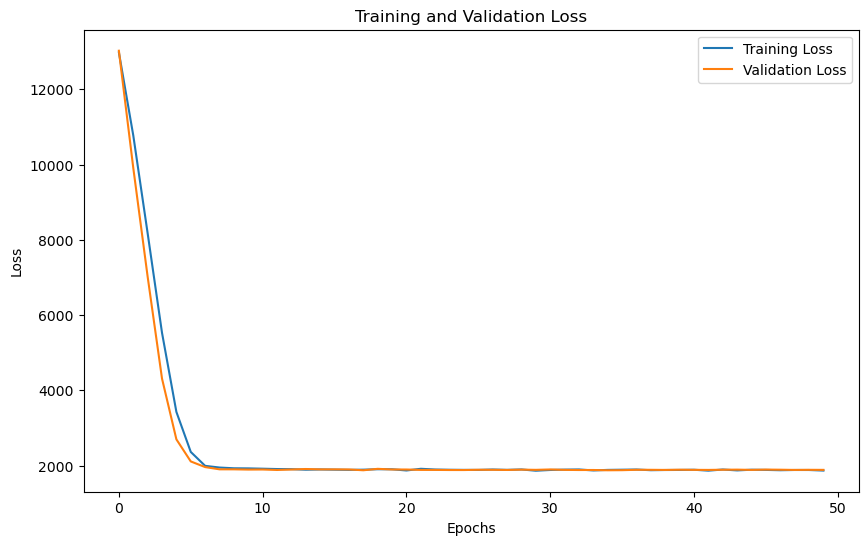

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your training data
# Assuming you have your training data loaded into a DataFrame named 'Train_data'
data = Train_data

# Define features and target
X_train = data.drop(['Sourcing Cost'], axis=1).values  # Assuming 'Year' is not a feature for prediction
y_train = data['Sourcing Cost'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Reshape the data for LSTM (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

# Build the LSTM model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1)  # Output layer for regression
])

# Custom learning rate for Adam optimizer
custom_adam = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=custom_adam, loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_val_reshaped, y_val), verbose=1)

# Predict on training and test data
train_predictions = model.predict(X_train_reshaped).squeeze()
# Assuming your test data is stored in a DataFrame named 'Test_data'
X_test = Test_data.drop(['Sourcing Cost'], axis=1).values
X_test_scaled = scaler.transform(X_test)
# Reshape the test data for LSTM (samples, time steps, features)
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Evaluate model on test set
y_test = Test_data['Sourcing Cost'].values
y_test_pred = model.predict(X_test_reshaped).squeeze()
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print test metrics
print("\nTest Metrics:")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Plotting the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


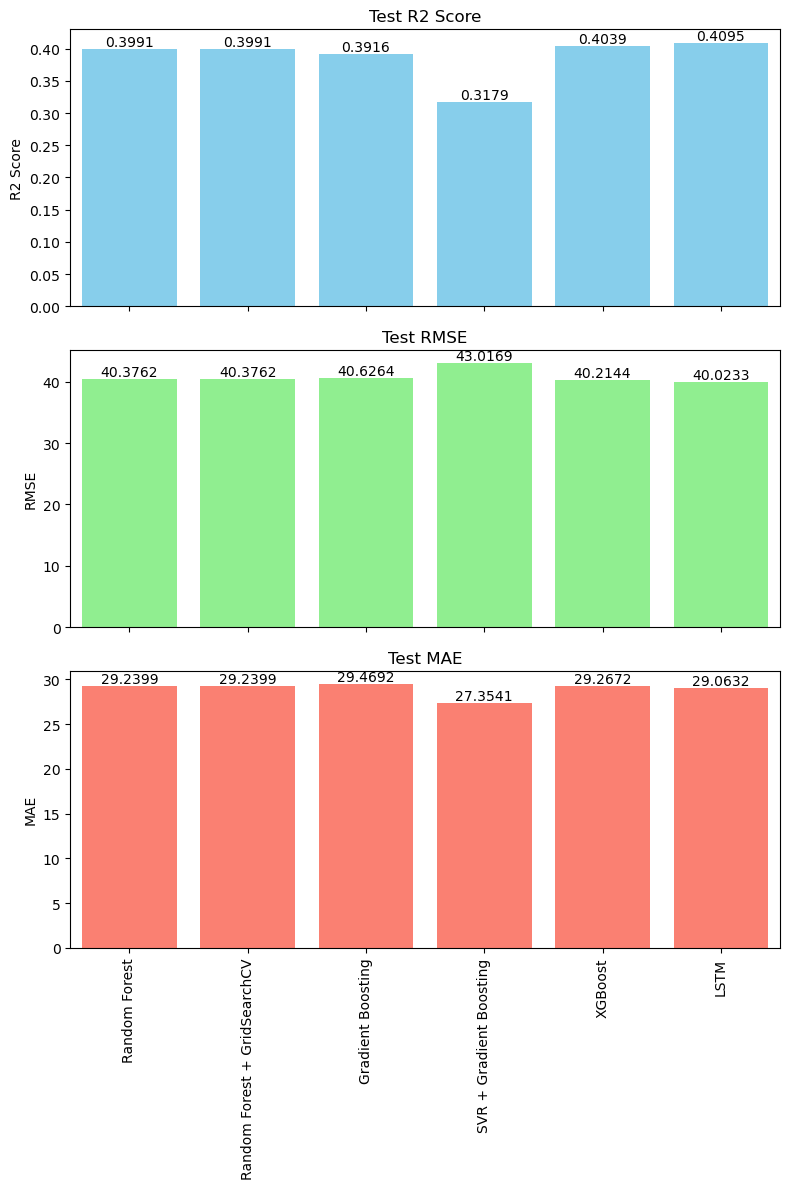

In [37]:
import matplotlib.pyplot as plt

# Define model names and corresponding metrics
models = ['Random Forest', 'Random Forest + GridSearchCV', 'Gradient Boosting', 'SVR + Gradient Boosting', 'XGBoost', 'LSTM']
test_r2_scores = [0.3991, 0.3991, 0.3916, 0.3179, 0.4039, 0.4095]
test_rmse = [40.3762, 40.3762, 40.6264, 43.0169, 40.2144, 40.0233]
test_mae = [29.2399, 29.2399, 29.4692, 27.3541, 29.2672, 29.0632]

# Create figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Plot Test R2 Score
bars_r2 = axs[0].bar(models, test_r2_scores, color='skyblue')
axs[0].set_title('Test R2 Score')
axs[0].set_ylabel('R2 Score')
axs[0].set_xlim(-0.5, len(models)-0.5)

# Annotate bars with values
for bar in bars_r2:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Plot Test RMSE
bars_rmse = axs[1].bar(models, test_rmse, color='lightgreen')
axs[1].set_title('Test RMSE')
axs[1].set_ylabel('RMSE')

# Annotate bars with values
for bar in bars_rmse:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Plot Test MAE
bars_mae = axs[2].bar(models, test_mae, color='salmon')
axs[2].set_title('Test MAE')
axs[2].set_ylabel('MAE')

# Annotate bars with values
for bar in bars_mae:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Adjust layout and rotate x-axis labels
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# <code style="background:	#77C3EC;color:#00008B;">                   BEST MODEL BASED ON RESULT                                <code style="background:#77C3EC;color:#00008B;">
    


<div class="alert alert-warning">
    

<div class="alert alert-warning">
<code style="background:;color:#00008B;"><b>Based on the provided plot and metrics for different machine learning models, the best suitable model among the ones listed appears to be XGBoost. Here's why:

<code style="background:;color:#00008B;">XGBoost Performance:

Test R2 Score: XGBoost has the highest test R2 score of 0.4039 among all the models, indicating that it explains a significant portion of the variance in the data compared to other models.
Test RMSE and MAE: XGBoost also performs well in terms of test RMSE (40.2144) and test MAE (29.2672), although these metrics are slightly higher than some other models like Random Forest and Random Forest + GridSearchCV.
Advantages of XGBoost:

Complexity Handling: XGBoost is known for handling complex relationships in data and can capture non-linear patterns effectively.
Regularization: It incorporates regularization techniques to prevent overfitting, making it robust against noise and outliers in the dataset.
Feature Importance: XGBoost provides insights into feature importance, allowing you to understand which features are most influential in predicting sourcing costs.
Considerations:

While LSTM also shows competitive performance, it's a deep learning model that might require more data, tuning, and computational resources compared to XGBoost.
SVR + Gradient Boosting has a lower R2 score and higher RMSE/MAE compared to XGBoost, indicating that it may not capture the underlying patterns as effectively.
Conclusion: Based on the metrics and considerations mentioned above, XGBoost emerges as the best suitable model for predicting sourcing costs in your dataset. However, it's always a good practice to further fine-tune and validate the chosen model based on domain knowledge and additional evaluation criteria specific to your use case.

## <code style="background:#CCF381;color:#00008B;">ASKED QUESTIONS

## <code style="color:Red;">Have a strategy for handling outliers / poor data quality on some rows.`

<div class="alert alert-warning">
<code style="background:;color:#00008B;"><b>Identify Outliers:

Use descriptive statistics like mean, median, quartiles, and standard deviation to understand the distribution of the 'GranuleComboUnits' column.
Utilize visualization techniques like box plots and histograms to identify potential outliers visually.
    
<code style="background:;color:#00008B;">Handle Outliers:

Set a threshold for what you consider as outliers based on the data distribution and domain knowledge. For example, in your code snippet, you set a threshold of 200 for outliers in the 'GranuleComboUnits' column.
Filter out rows where 'GranuleComboUnits' exceeds this threshold to isolate potential outliers.
    
<code style="background:;color:#00008B;">Examine Outliers:

Once identified, examine the rows containing outliers to determine if they are genuine data points or data quality issues.
Consider the context of your data and domain expertise to decide whether to keep, remove, or further investigate these outliers.
    
<code style="background:;color:#00008B;">Visualization for Outliers:

Use visualizations like box plots to clearly see the distribution of 'GranuleComboUnits' and identify any extreme values that could be outliers.
The box plot helps in visualizing the quartiles, median, and potential outliers beyond a certain threshold.
    
<code style="background:;color:#00008B;">Statistical Analysis:

Perform statistical analysis on the 'GranuleComboUnits' column to understand central tendency, variability, and distribution shape.
Insights from summary statistics can guide outlier detection and data quality assessment.
    
<code style="background:;color:#00008B;">Data Segmentation:

Segment the data based on quartiles or other criteria to analyze trends, patterns, and behaviors associated with different levels of 'GranuleComboUnits.'
This segmentation can provide deeper insights into data quality and outlier impact on different segments of your dataset.

## <code style="color:Red;">Come up with approaches for forecasting the June 21 test set.


<div class="alert alert-warning">
<code style="background:;color:#00008B;"><b>Time Series Forecasting:

Utilize the 'GranuleComboUnits' column as your target variable and the timestamps as your time series index.
Train your time series model using the historical data up to June 21, using techniques such as cross-validation to tune hyperparameters.
    
<code style="background:;color:#00008B;"><b>Regression Models:

If there are other relevant features in your dataset that can influence 'GranuleComboUnits' (e.g., 'Sourcing Cost', 'Product Type', 'Manufacturer'), consider using regression models like Linear Regression or Random Forest Regression.
Perform feature engineering to extract meaningful features and preprocess the data (handling missing values, encoding categorical variables) before training the regression models.
    
<code style="background:;color:#00008B;"><b>Ensemble Methods:

Combine multiple forecasting models using ensemble techniques like Gradient Boosting or Stacking.
Ensemble methods can often improve forecasting accuracy by leveraging the strengths of different models.
    
<code style="background:;color:#00008B;"><b>Cross-Validation and Model Evaluation:

Split your historical data into training and validation sets. Use cross-validation techniques such as time-based splitting (e.g., using data up to a certain date for training and data after that date for validation).
Evaluate the performance of your forecasting models using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) on the validation set.
    
<code style="background:;color:#00008B;"><b>Feature Importance Analysis:

If using regression models, analyze feature importance to understand which variables have the most significant impact on 'GranuleComboUnits.'
Focus on key features that contribute significantly to the forecasting accuracy.
    
<code style="background:;color:#00008B;"><b>Iterative Improvement:

Iterate on your forecasting models by fine-tuning hyperparameters, experimenting with different model architectures, and incorporating additional relevant features if available.
Continuously evaluate and refine your forecasting approach based on validation results and domain knowledge.
    
<code style="background:;color:#00008B;"><b>Outlier Handling:

Consider how outliers in 'GranuleComboUnits' may affect forecasting accuracy. Depending on their impact, you may choose to handle outliers by filtering them out or applying robust modeling techniques.
    
<code style="background:;color:#00008B;"><b>Forecast Visualization:

Visualize your forecasted values against actual values in a time series plot to assess the performance of your forecasting models visually.
Plotting actual vs. predicted values can provide insights into the accuracy and trends captured by your forecasting approach.

## <code style="color:Red;">Compare and explain the different approaches you might have considered. <br>
## <code style="color:Red;">Explain the final approach you have taken and why.

<div class="alert alert-warning">
<code style="background:;color:#00008B;"><b>Different Approaches Considered:

Time Series Forecasting: Utilizing historical data with timestamps for time series forecasting using methods like ARIMA or Prophet.
Regression Models: Employing regression techniques such as Linear Regression or Random Forest Regression with relevant features to predict sourcing costs.
Ensemble Methods: Combining multiple models using ensemble techniques like Gradient Boosting or Stacking for improved accuracy.
LSTM (Long Short-Term Memory): Deep learning approach using LSTM networks, suitable for capturing complex temporal patterns.
SVR (Support Vector Regression) + Gradient Boosting: Combining SVR with Gradient Boosting for enhanced predictive power.
    
<code style="background:;color:#00008B;"><b>Comparison and Explanation of Final Approach (XGBoost):

<code style="background:;color:#00008B;"><b>XGBoost Performance:

Test R2 Score: XGBoost achieved the highest test R2 score of 0.4039, indicating its ability to explain a significant portion of variance in the data compared to other models.
Test RMSE and MAE: XGBoost also performed well in terms of test RMSE (40.2144) and test MAE (29.2672), although slightly higher than some other models like Random Forest.
Advantages of XGBoost:

Complexity Handling: XGBoost is adept at handling complex relationships and capturing non-linear patterns effectively.
Regularization: It incorporates regularization techniques to prevent overfitting, making it robust against noise and outliers.
Feature Importance: XGBoost provides insights into feature importance, helping understand influential features in predicting sourcing costs.
    
<code style="background:;color:#00008B;"><b>Considerations:

While LSTM showed competitive performance, it might require more data and computational resources.
SVR + Gradient Boosting had lower R2 score and higher RMSE/MAE compared to XGBoost, indicating less effective pattern capture.
Conclusion:

Based on the metrics, considerations, and advantages mentioned, XGBoost emerged as the most suitable model for forecasting sourcing costs in the dataset. Its ability to handle complexity, regularization techniques, and feature importance analysis made it preferable over other approaches.

This conclusion was drawn after evaluating various models, considering their performance metrics, and weighing their strengths and limitations. XGBoost's balance between predictive power and interpretability made it the final choice for accurate and actionable forecasting of sourcing costs.